# Week 7 - Decision Tree

## Learning Objectives
+ Understanding decision tree
+ Decision Tree classification 
    + Iris dataset
    + Visualizing the decision surface
    + Visualizing decision tree
+ Decision Tree Regression
    + Auto MPG dataset
+ Moving onto Random Forests


The contents of this tutorial are based on the Chapter 6 of "Hands-On Machine Learning with Scikit-Learn and TensorFlow : Concepts, Tools, and Techniques to Build Intelligent Systems" by Géron, Aurélien \[[NUS library link](https://nus.summon.serialssolutions.com/2.0.0/link/0/eLvHCXMwdV1LSwMxEB5svXjyVfFRJX9gtZtsNg0UL9Kl4FFB6KVkzVikdhdqi3_fyTRbW9Fbkh2GkJ3kG4aZbwCUvO0lv94ErzR6b8gdTo16zbw0ztnUlbnX0vfzN-7-Jp_Gavioxj_5suRpkdLVmlHwc7oJXChCXaPp5W0pxcb9sjFSaTQ5DZFTigMtNtNkyVzUZcneyN8wWxObNsRP8WN_dx5IYVu0hS3UKY5gH0MpwjHsYXUCh00DBhHv4ym4wdwtZvejUK47uONxsl6qKzHnNEkUsS_EVISQqyDEm70vd4VZQpASEdLZ60XxUX9FiQ50i-HzwyihvU1iqGfSHIxUZ9Cu6grPQTjlrCsD8HvMcomlRdTe9XTgYUl1eQGdP1Vc_rN-BQcyQBuHIbrQXi5WeM1HdMM_4htft4eB)\], [sklearn tutorial](https://scikit-learn.org/0.15/auto_examples/tree/plot_iris.html), [sklearn article on decision trees](https://scikit-learn.org/stable/modules/tree.html).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Decision Trees in sklearn

Decision Trees can be used for classification as well as regression, using ```DecisionTreeClassifier``` and ```DecisionTreeRegressor```. They require little data preparation as compared to other methods, in particular they do not require feature scaling and centering. However, do note that the sklearn APIs do not support missing values, and hence all data should have **missing values imputed before** it is passed to these APIs.

# Decision Tree Classification

## Dataset - Iris Dataset

For this part of the tutorial, we will start with a classic dataset we have previously used - iris dataset.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [3]:
import numpy as np

rng = np.random.RandomState(42)

As we know from previous tutorials, training a classifier is as simple as using the correct API and running ```fit()``` and ```predict()``` functions on it. So let us use the ```DecisionTreeClassifier``` and fit it on the data of petal length and width. The reason for choosing just two of the columns of the dataset is to visualize the decision surface easily at first.

## Splitting the training and testing sets

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rng)

In [5]:
print(X_train.shape)
print(X_test.shape)

(120, 2)
(30, 2)


## Setting up the decision tree classifier, and fitting it to the data

We need to constrain the decision tree. If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely, and most likely overfitting it. To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training i.e. regularize it. The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the Decision Tree. 

A decision tree is often called a nonparametric model, not because it does not have any parameters (it often has a lot) but because the number of parameters is not determined prior to training, so the model structure is free to stick closely to the data. In contrast, a parametric model such as a linear model has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting). 

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = rng)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2,
                       random_state=RandomState(MT19937) at 0x7F3F0260E380)

## Estimating the probability that an instance belongs to each class

A Decision Tree can also estimate the probability that an instance belongs to a particular class k: first it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node. 

For example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide. The corresponding leaf node is the depth-2 left node, so the Decision Tree should output the probabilities as the fraction of samples of the same class in a leaf, in our case the size of training samples is 130.

The prediction of all points that fall within this leaf node is the same.

In [9]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.11627907, 0.88372093]])

In [10]:
tree_clf.predict([[5, 1.5]])

array([2])

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Plotting the results

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
n_classes = 3
plot_step = 0.02

We first visualise the predictions of our decision tree, and then superimpose the raw data on top of it.

(0.30000000000000004, 7.880000000000007, -0.9, 3.2800000000000034)

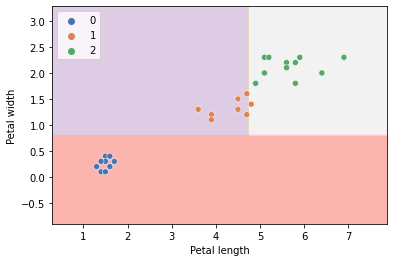

In [13]:
# create a meshgrid of points, the decision tree has to make a prediction at each point
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))

# flatten the meshgrid, and use the decision tree to make prediction along these points, then reshape it into the shape of the meshgrid
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)
# then plot a filled contour of the predictions made by the decision tree
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis("tight")

sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette="deep")

plt.axis("tight")

As you can see Decision Trees are fairly intuitive and their decisions are easy to interpret. Such models are often called white box models. 

# Metrics 

The ```DecisionTreeClassifier``` also has a ```score``` function which returns the **mean accuracy** on given test data and labels. For other metrics, the ```predict``` function would still be used.

In multi-label classification such as this, ```score``` gives is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [14]:
tree_clf.score(X_test, y_test)

0.9666666666666667

We can find the importance of each feature computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [15]:
tree_clf.feature_importances_

array([0.42184638, 0.57815362])

Keep in mind that if a feature has a low feature importance value, it doesn’t necessarily mean that the feature isn’t important for prediction, it just means that the particular feature wasn’t chosen at a particularly early level of the tree. In some cases, the feature could be identical or highly correlated with another informative feature. Feature importance values also don’t tell you which class they are very predictive for or relationships between features which may influence prediction. 

Comments:

Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e., questions only have yes/no answers). However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.

## Understanding and visualising the decision tree

[Text(0.4, 0.8333333333333334, 'node #0\npetal width <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.2, 0.5, 'node #1\ngini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'node #2\npetal length <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'node #3\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'node #4\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica')]

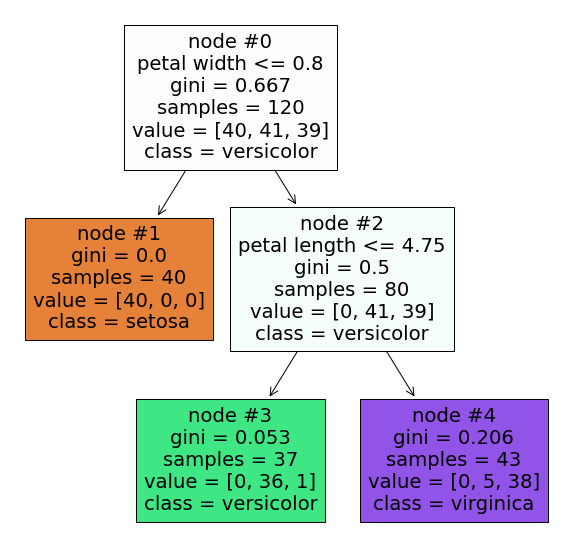

In [22]:
from sklearn.tree import plot_tree

plt.figure(figsize = (10,10))
plot_tree(tree_clf, feature_names = ["petal length", "petal width"], class_names = iris.target_names, node_ids = True, filled = True)

### Reading this tree structure: 
Suppose you find an iris flower and you want to classify it. 
You start at the root node (depth 0, at the top): this node asks whether the flower’s petal width is smaller than 0.8 cm. 
If it is, then you move down to the root’s left child node (depth 1, left). In this case, it is a leaf node (i.e., it does not have any children nodes), so it does not ask any questions: you can simply look at the predicted class for that node and the Decision Tree predicts that your flower is an Iris-Setosa (class=setosa).
If it is not, then you move down to root's right child node and again face the question.

The gini score of node 1 is 0. The gini score quantifies the purity of the node/leaf. A gini score greater than 0 implies that samples contained within that node belong to different classes. A gini score of 0 means that the node is pure - within that node only a single class of samples exist. In our tree, we have gini score greater than 0 at the root node, implying samples in root node are from different classes.

The value list tells us how many samples at the given node fall into each category. The categories are setosa, versicolor and virginica here. This is essentially similar information to what the gini score is giving us. 

We can find the path taken by a flower whose petals are 5 cm long and 1.5 cm wide. A non zero element in the indicator matrix at position (i, j) indicates that the sample i goes through the node j. Or, for one sample i, the positions of the non zero elements in row i of the indicator matrix designate the ids of the nodes that sample goes through.

In [29]:
print(tree_clf.decision_path([[5, 1.5],[5, 1.5]]))

  (0, 0)	1
  (0, 2)	1
  (0, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 4)	1


## An overfitted decision tree

In [24]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=rng)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5,
                       random_state=RandomState(MT19937) at 0x7F3F0260E380)

[Text(0.3181818181818182, 0.9166666666666666, 'node #0\npetal width <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.22727272727272727, 0.75, 'node #1\ngini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.4090909090909091, 0.75, 'node #2\npetal length <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.18181818181818182, 0.5833333333333334, 'node #3\npetal width <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.09090909090909091, 0.4166666666666667, 'node #4\ngini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.2727272727272727, 0.4166666666666667, 'node #5\ngini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6363636363636364, 0.5833333333333334, 'node #6\npetal width <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(0.45454545454545453, 0.4166666666666667, 'node #7\npetal length <

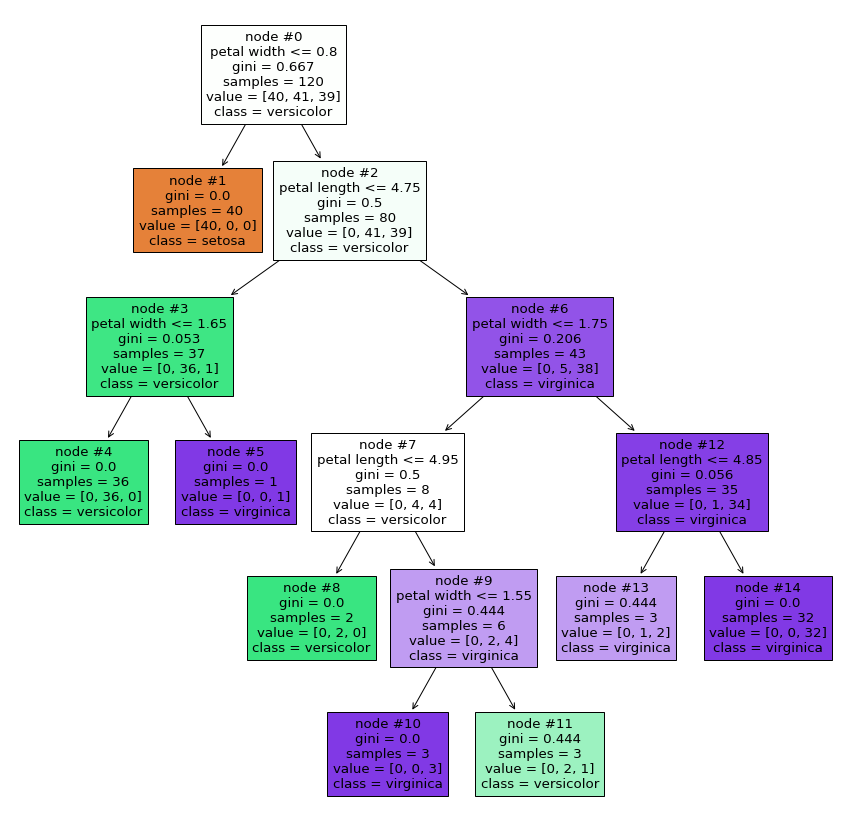

In [25]:
fig, ax = plt.subplots(figsize=(15,15))
plot_tree(tree_clf, feature_names=['petal length', 'petal width'], class_names=iris.target_names, 
               filled=True, node_ids=True, ax=ax)

(0.0, 7.68, -0.9, 3.4800000000000044)

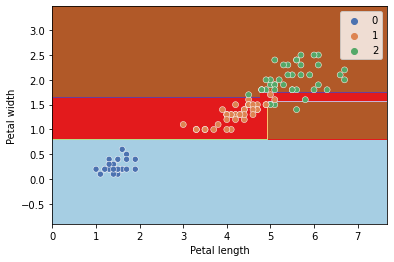

In [26]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis("tight")

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette="deep")

plt.axis("tight")

Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation. 

You may have also noticed that decision trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to training set rotation. One way to handle the problem of generalizability caused due to this is to use PCA, which often results in better orientation of training data.

Lastly, it is important to note that if some classes dominate, biased decision trees can get created. It is therefore recommended to **balance** the dataset prior to fitting with the decision tree. Please refer to the documentation of [imbalanced-learn](https://imbalanced-learn.org/stable/user_guide.html#user-guide) for methods on balancing the dataset.

# Decision Tree Regression

We use the [auto-mpg dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/) from the UCI Machine Learning Repository. We read the data to a csv, then create our dataset (X) with labels (y), preprocess the data and do a train-test-split. We want to predict the MPG values using regression. 

In [30]:
root = "/content/drive/MyDrive/Colab Notebooks/IT5006/Week 7/"

In [31]:
import pandas as pd

df = pd.read_csv(root+'auto-mpg.data', sep = '\s+', # separates on any one or more white space character
                 header=None, 
                 names=['mpg', 'cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'])

In [32]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [33]:
df.describe() # no horsepower column

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Some datapoints are ? and we have to replace them with NaN
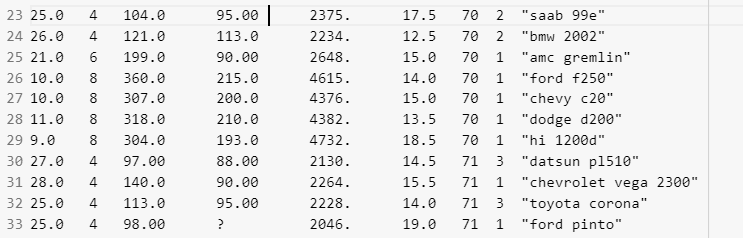

In [34]:
df.replace('?',np.nan, inplace=True)

In [35]:
df['horsepower'] = df['horsepower'].astype('float')

In [37]:
df.dropna(axis=0, inplace=True)

In [38]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


The horsepower has 6 missing values. We can just drop these rows as of now.

In [39]:
y = df.mpg
X = df.drop('mpg', axis=1)
X.drop('car name', axis=1, inplace=True)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rng)

In [41]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
83,4,98.0,80.0,2164.0,15.0,72,1
371,4,135.0,84.0,2525.0,16.0,82,1
279,4,98.0,68.0,2135.0,16.6,78,3
208,8,318.0,150.0,3940.0,13.2,76,1
78,4,120.0,87.0,2979.0,19.5,72,2


In [42]:
X_train.describe()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,5.492013,194.838658,104.261981,2980.827476,15.576997,76.089457,1.552716
std,1.683470,103.200873,38.171279,842.305586,2.755993,3.726850,0.799399
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,105.000000,76.000000,2234.000000,13.700000,73.000000,1.000000
50%,4.000000,151.000000,95.000000,2833.000000,15.500000,76.000000,1.000000
75%,8.000000,260.000000,122.000000,3609.000000,17.300000,79.000000,2.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [44]:
from sklearn.tree import DecisionTreeRegressor

regr1 = DecisionTreeRegressor(max_depth =2)
regr2 = DecisionTreeRegressor(max_depth =5)

regr1.fit(X_train, y_train)
regr2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

[Text(0.5, 0.8333333333333334, 'node #0\ndisplacement <= 159.5\nsquared_error = 61.319\nsamples = 313\nvalue = 23.537'),
 Text(0.25, 0.5, 'node #1\nhorsepower <= 84.5\nsquared_error = 34.292\nsamples = 164\nvalue = 29.207'),
 Text(0.125, 0.16666666666666666, 'node #2\nsquared_error = 26.44\nsamples = 99\nvalue = 31.982'),
 Text(0.375, 0.16666666666666666, 'node #3\nsquared_error = 16.658\nsamples = 65\nvalue = 24.98'),
 Text(0.75, 0.5, 'node #4\nhorsepower <= 141.0\nsquared_error = 16.735\nsamples = 149\nvalue = 17.296'),
 Text(0.625, 0.16666666666666666, 'node #5\nsquared_error = 13.041\nsamples = 90\nvalue = 19.477'),
 Text(0.875, 0.16666666666666666, 'node #6\nsquared_error = 4.051\nsamples = 59\nvalue = 13.969')]

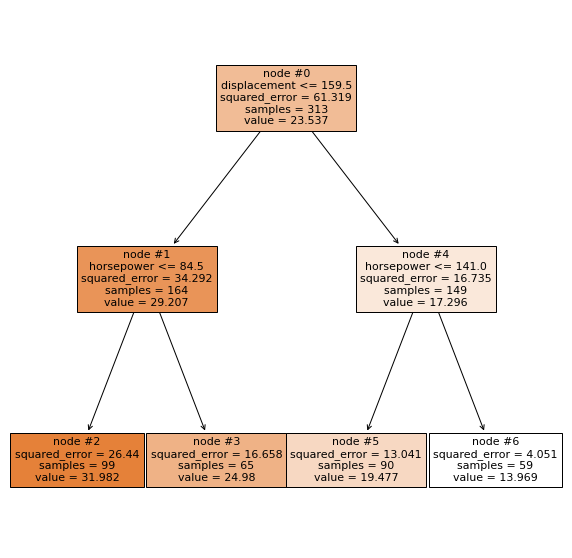

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
plot_tree(regr1, feature_names=X_train.columns,
               filled=True, node_ids=True, ax=ax)

The main difference is that instead of predicting a class in each node, this tree predicts a value. For a new instance, you traverse the tree and reach the leaf node that predicts a value. This prediction is simply the average target value of the training instances(samples) associated with that leaf node. This prediction results in Mean Squared Error (MSE) equal to value stated over these samples. The CART algorithm works mostly the same way as earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE.

In the regression tree visualization, the darker images indicate higher predicted target values.

The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value.

In [46]:
print(X_test.iloc[10])

cylinders          4.0
displacement     111.0
horsepower        80.0
weight          2155.0
acceleration      14.8
model year        77.0
origin             1.0
Name: 217, dtype: float64


In [47]:
regr1.predict(X_test.iloc[10].values.reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([31.98181818])

Let us compare the performance of normal linear regression vs the decision tree regression.

In [48]:
from sklearn.linear_model import LinearRegression

Linear_Model = LinearRegression()
Linear_Model.fit(X_train, y_train)
y_pred_lin = Linear_Model.predict(X_test)

In [52]:
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
print(mean_squared_error(y_test, y_pred_lin)) # instead of y_true and y_pred?
print(Linear_Model.score(X_test, y_test))

10.882549335079037
0.8136394127639589


In [53]:
print(mean_squared_error(y_test, y_1))
print(r2_score(y_test, y_1))

19.413489387411108
0.6675494710714023


In [54]:
print(mean_squared_error(y_test, y_2))
print(r2_score(y_test, y_2))

6.538552420245008
0.8880291344250867


Using a deeper decision tree, we can explain more variability in the auto-mpg dataset than with a linear regressor. 

When should we use decision trees? If we have knowledge that a dataset does not assume linearity, decision trees do not make any assumptions regarding the data. However, if linearity exists, we might be better off doing linear regression.

# Introduction to Random Forests

The random forest is a classification algorithm consisting of many decisions trees.

The intuition here is that if you aggregate the predictions of a group of uncorrelated predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor. 

You can train a group of Decision Tree classifiers, each on a different random subset of the training set. To make predictions, you just obtain the predictions of all individual trees, then predict the class that gets the most votes. Such an **ensemble** of Decision Trees is called a Random Forest, and despite its simplicity, this is one of the most powerful Machine Learning algorithms available today. 

You can use the ```BaggingClassifier``` API along with the ```DecisionTreeClassifier``` to create the Random Forests. But to make our job easy, sklearn provides us with the ```RandomForestClassifier```.

In [55]:
X = iris.data
y = iris.target

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

In [58]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators= 500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [59]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=rng)
tree_clf.fit(X_train, y_train)
y_pred_dt = tree_clf.predict(X_test)

In [60]:
from sklearn.metrics import classification_report
# the summary of the precision, recall, F1 score for each class
print("Decision Tree")
print(classification_report(y_test, y_pred_dt))
print("Random Forest")
print(classification_report(y_test, y_pred_rf))

Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

